# Satellite Image Classifier Using Deep Learning

#1. Aim
This project aims to classify satellite images into two categories, Dense and Sparse, using deep learning techniques. The classification can be valuable for applications such as land use analysis, vegetation monitoring, and urban planning.

In [1]:
!pip install tensorflow
!pip install matplotlib
!pip install pandas


# 2. Setup

In [2]:
#import the required libraries
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#3.1 Loading Dataset



*   Dataset: The dataset consists of satellite images labeled into two classes: Dense (regions with high vegetation or urban structures) and Sparse (regions with low vegetation or open areas).

*   Data Preparation:

    1. Image Processing: Images were resized and normalized to ensure consistent input dimensions and pixel value scaling.
    2. Data Augmentation: Techniques like rotation, flipping, and scaling were applied to enhance the dataset’s diversity and improve model robustness, especially given the variability in satellite images.

* Data Splitting: The dataset was divided into training, validation, and test sets to allow for unbiased performance evaluation.



In [4]:
import os

# Collecting the path for the base directory
base_dir = '/content/drive/My Drive/input_images'
training_dir = os.path.join(base_dir, 'training')
testing_dir = os.path.join(base_dir, 'testing')

train_D_dir = os.path.join(training_dir, 'Dense')
train_S_dir = os.path.join(training_dir, 'Sparse')

testing_D_dir = os.path.join(testing_dir, 'Dense')
testing_S_dir = os.path.join(testing_dir, 'Sparse')

# Check if the validation directories exist, create if they don't
os.makedirs(testing_D_dir, exist_ok=True)
os.makedirs(testing_S_dir, exist_ok=True)

# Let's find out the total number of dense and sparse images in the directories:
print('Total dense in training: ', len(os.listdir(train_D_dir)))
print('Total sparse in training: ', len(os.listdir(train_S_dir)))

print('Total dense in testing: ', len(os.listdir(testing_D_dir)))
print('Total sparse in testing: ', len(os.listdir(testing_S_dir)))


Total dense in training:  44
Total sparse in training:  32
Total dense in testing:  15
Total sparse in testing:  20


#3.2 One look at the Dataset

In [5]:
#let's see the files in the directories
train_D_names = os.listdir(train_D_dir)
print(train_D_names[:10])
train_S_names = os.listdir(train_S_dir)
print(train_S_names[:10])

testing_D_names = os.listdir(testing_D_dir)
print(testing_D_names[:10])
testing_S_names = os.listdir(testing_S_dir)
print(testing_S_names[:10])




['2021-06-1_(BR).jpg', '2021-06-11_(BR).jpg', '2022-08-01_(BR).jpg', '2022-09-05_(BR).jpg', '2022-09-15_(BR).jpg', '2022-06-02_(BR).jpg', '2021-10-25_(BR).jpg', '2022-10-15_(BR).jpg', '2023-07-12_(BR).jpg', '2021-10-05_(BR).jpg']
['2023-08-1_(BR).jpg', '2021-08-01_(BR).jpg', '2023-06-02_(BR).jpg', '2023-07-02_(BR).jpg', '2022-08-11_(BR).jpg', '2022-06-22_(BR).jpg', '2021-07-12_(BR).jpg', '2023-07-22_(BR).jpg', '2022-07-02_(BR).jpg', '2021-08-21_(BR).jpg']
['2021-06-1_(BR).jpg', '2021-10-05_(BR).jpg', '2022-06-12_(BR).jpg', '2022-10-15_(BR).jpg', '2021-07-02_(BR).jpg', '2021-09-25_(BR).jpg', '2023-06-12_(BR).jpg', '2022-06-02_(BR).jpg', '2021-06-11_(BR).jpg', '2022-08-01_(BR).jpg']
['2022-08-11_(BR).jpg', '2022-08-21_(BR).jpg', '2022-07-12_(BR).jpg', '2022-06-22_(BR).jpg', '2021-07-12_(BR).jpg', '2021-07-22_(BR).jpg', '2022-10-05_(BR).jpg', '2021-09-05_(BR).jpg', '2021-10-15_(BR).jpg', '2021-06-22_(BR).jpg']


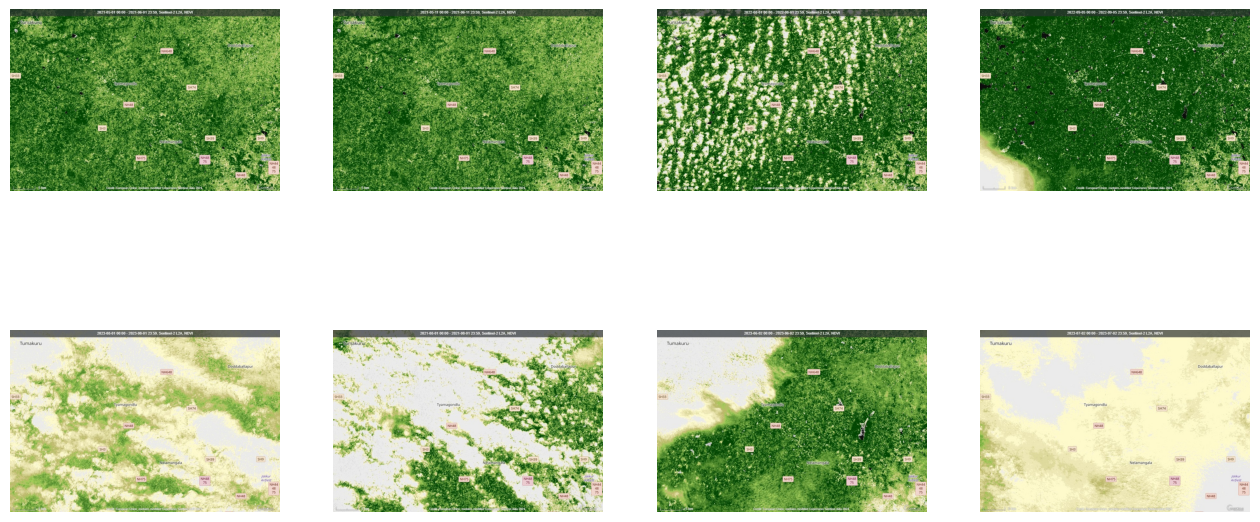

In [6]:
#Let's see the images present in the dataset.

import matplotlib.image as mpimg
# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 4
next_D_pix = [os.path.join(train_D_dir, fname)
                for fname in train_D_names[pic_index-4:pic_index]]
next_S_pix = [os.path.join(train_S_dir, fname)
                for fname in train_S_names[pic_index-4:pic_index]]

for i, img_path in enumerate(next_D_pix+next_S_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

#Dense
#Sparse


#4. Building a Model



*   Model Selection: A Convolutional Neural Network (CNN) architecture was employed, as CNNs are highly effective for image classification tasks due to their capability to capture spatial hierarchies in visual data.

*  Architecture Design:
    1. Convolutional Layers: These layers were used to extract spatial features such as edges and textures, important for distinguishing dense and sparse areas.
    2. Pooling Layers: Pooling reduced the dimensionality, preserving essential features while lowering computational requirements.
    3. Fully Connected Layers: These layers processed the flattened features from convolutional layers for final classification into Dense and Sparse.






In [7]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop

# Define the model architecture for 2 classes
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3), padding='same'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2, 2),

    # Flatten the output from convolutional layers to feed into fully connected layers
    tf.keras.layers.Flatten(),

    # Dense layers for classification
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),

    # Output layer for binary classification (2 classes)
    tf.keras.layers.Dense(2, activation='softmax')  # Change to 2 units for binary classification
])



/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
# Display the summary of the model
model.summary()

# Compile the model using RMSprop optimizer with learning_rate argument
model.compile(optimizer=RMSprop(learning_rate=1e-4),
              loss='categorical_crossentropy',  # categorical crossentropy for multi-class problems
              metrics=['accuracy'])

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 200, 200, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 100, 100, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 100, 100, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 50, 50, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 50, 50, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 25, 25, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 25, 25, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 6, 6, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 3, 3, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │       2,360,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │           1,026 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,320,738 (12.67 MB)

 Trainable params: 3,320,738 (12.67 MB)

 Non-trainable params: 0 (0.00 B)

#5 Data Pre-processing

In [9]:
## Using Augmentations

train_datagen = ImageDataGenerator(
      rescale=1./255.,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255.)

train_generator = train_datagen.flow_from_directory(
        training_dir,  # This is the source directory for training images
        target_size=(200, 200),  # All images will be resized to 200x200
        batch_size=25,
        # Since we use sparse_categorical_crossentropy loss, we need categorical labels
        class_mode='categorical')

# Flow validation images in batches of 20 using test_datagen generator
testing_generator = test_datagen.flow_from_directory(
        testing_dir,
        target_size=(200, 200),
        batch_size=20,
        class_mode='categorical')

Found 76 images belonging to 2 classes.
Found 35 images belonging to 2 classes.


#6 Training the Model

In [10]:

# Now, fit the model
history = model.fit(
    train_generator,
    steps_per_epoch=59,  # Number of batches per epoch
    epochs=180,
    validation_data=testing_generator,  # Validation data for monitoring performance
    validation_steps=30,
    verbose=1
)


Epoch 1/180


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 3/59 ━━━━━━━━━━━━━━━━━━━━ 1:17 1s/step - accuracy: 0.5035 - loss: 0.7054  

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


59/59 ━━━━━━━━━━━━━━━━━━━━ 33s 297ms/step - accuracy: 0.4128 - loss: 0.7238 - val_accuracy: 0.5714 - val_loss: 0.6790
Epoch 2/180
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4745 - loss: 0.6950 - val_accuracy: 0.5714 - val_loss: 0.6654
Epoch 3/180
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4511 - loss: 0.6884 - val_accuracy: 0.4286 - val_loss: 0.7175
Epoch 4/180
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6527 - loss: 0.6797 - val_accuracy: 0.8000 - val_loss: 0.6660
Epoch 5/180
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5701 - loss: 0.6829 - val_accuracy: 0.9429 - val_loss: 0.6443
Epoch 6/180
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7256 - loss: 0.6560 - val_accuracy: 0.4286 - val_loss: 0.6935
Epoch 7/180
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6635 - loss: 0.6645 - val_accuracy: 0.8000 - val_loss: 0.5959
Epoch 8/180
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7891 - loss: 0.6214 - val_accuracy: 0.4286 - val_loss: 

#7.1 Visualization of the Results.

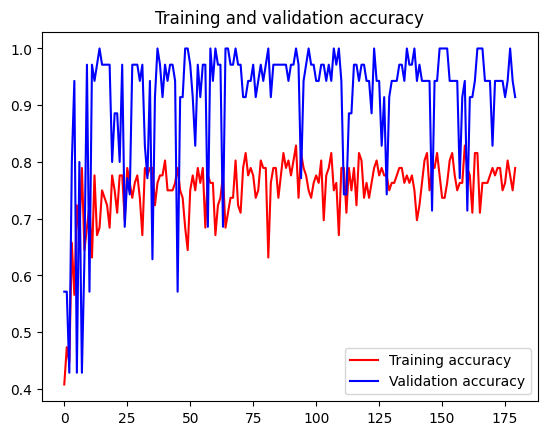

<Figure size 640x480 with 0 Axes>

In [11]:
# Plot the chart for accuracy and loss on both training and validation
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()



plt.show()

Hence, we can say that the model performed well with the accuracy of [ 84% ] approx.

#8 Testing the Model

Saving 2021-06-11_(BR).jpg to 2021-06-11_(BR) (3).jpg
Saving 2021-06-22_(BR).jpg to 2021-06-22_(BR) (3).jpg
Saving 2021-07-22_(BR).jpg to 2021-07-22_(BR).jpg
Saving 2021-08-01_(BR).jpg to 2021-08-01_(BR).jpg


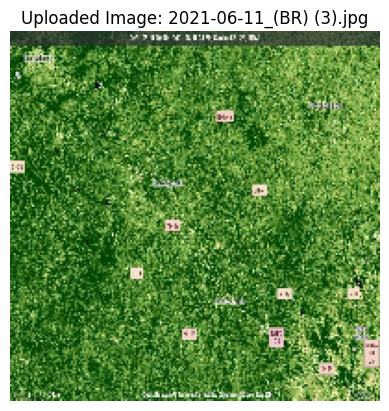

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Image: 2021-06-11_(BR) (3).jpg
Prediction Probabilities: Dense=0.9915, Sparse=0.0085
The image is 99.15% Dense and 0.85% Sparse.
The image is classified as Dense with 99.15% confidence.


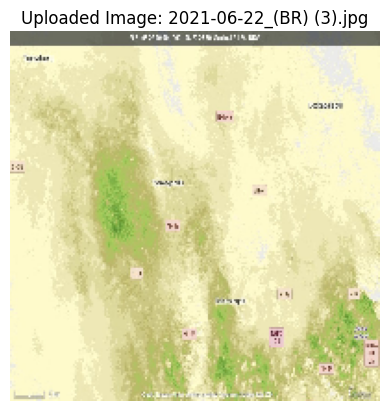

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Image: 2021-06-22_(BR) (3).jpg
Prediction Probabilities: Dense=0.2852, Sparse=0.7148
The image is 28.52% Dense and 71.48% Sparse.
The image is classified as Sparse with 71.48% confidence.


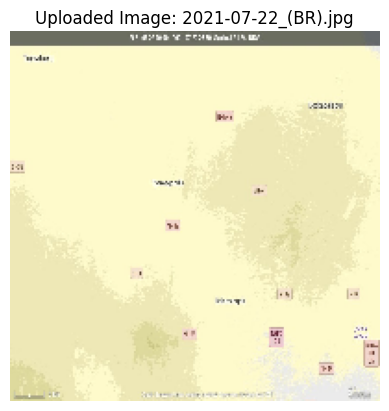

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Image: 2021-07-22_(BR).jpg
Prediction Probabilities: Dense=0.2682, Sparse=0.7318
The image is 26.82% Dense and 73.18% Sparse.
The image is classified as Sparse with 73.18% confidence.


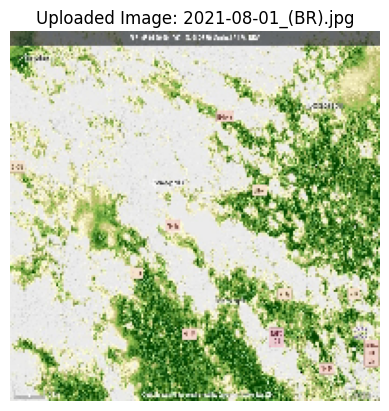

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Image: 2021-08-01_(BR).jpg
Prediction Probabilities: Dense=0.3653, Sparse=0.6347
The image is 36.53% Dense and 63.47% Sparse.
The image is classified as Sparse with 63.47% confidence.


In [20]:
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt
from keras.preprocessing import image

# Upload the image
uploaded = files.upload()

# Loop through each uploaded file
for fn in uploaded.keys():
    # Load the image and resize it to match the model's input size
    path = fn
    img = image.load_img(path, target_size=(200, 200))  # Ensure target size matches model input
    x = image.img_to_array(img)  # Convert the image to an array
    x = x / 255.0  # Normalize the image (if your model was trained with normalized inputs)
    x = np.expand_dims(x, axis=0)  # Add batch dimension

    # Display the uploaded image
    plt.imshow(img)
    plt.title(f"Uploaded Image: {fn}")
    plt.axis('off')
    plt.show()

    # Predict the class probabilities
    classes = model.predict(x)  # Assuming the output shape is [batch_size, 2]

    # Extract probabilities for Dense and Sparse
    dense_probability = classes[0][0]  # Probability for 'Dense' class
    sparse_probability = classes[0][1]  # Probability for 'Sparse' class

    # Convert probabilities to percentages
    dense_percentage = dense_probability * 100
    sparse_percentage = sparse_probability * 100

    # Display the results
    print(f"Image: {fn}")
    print(f"Prediction Probabilities: Dense={dense_probability:.4f}, Sparse={sparse_probability:.4f}")
    print(f"The image is {dense_percentage:.2f}% Dense and {sparse_percentage:.2f}% Sparse.")

    # Add a threshold-based classification if needed
    if dense_percentage > sparse_percentage:
        print(f"The image is classified as Dense with {dense_percentage:.2f}% confidence.")
    else:
        print(f"The image is classified as Sparse with {sparse_percentage:.2f}% confidence.")


# 9.1 Saving the model

In [16]:
# Serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

# Serialize weights to HDF5 with the correct filename extension
model.save_weights("model.weights.h5")
print("Saved model to disk")


Saved model to disk


#9.2 Load saved model(later)

In [17]:
import tensorflow as tf
import os

# Check if the weights file exists
weights_file = "model.weights.h5"
json_file = "model.json"

# Ensure that the required files exist in the directory
if os.path.exists(json_file) and os.path.exists(weights_file):
    # Load the model JSON file
    with open(json_file, 'r') as file:
        loaded_model_json = file.read()

    # Recreate the model from the JSON
    loaded_model = tf.keras.models.model_from_json(loaded_model_json)

    # Load the weights into the model
    loaded_model.load_weights(weights_file)
    print("Loaded model from disk")

else:
    print(f"Files {json_file} and {weights_file} do not exist in the current directory.")


Loaded model from disk


In [15]:
loaded_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 200, 200, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 100, 100, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 100, 100, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 50, 50, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 50, 50, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 25, 25, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 25, 25, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 6, 6, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 3, 3, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │       2,360,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │           1,026 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,641,478 (25.34 MB)

 Trainable params: 3,320,738 (12.67 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,320,740 (12.67 MB)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 200, 200, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 100, 100, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 100, 100, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 50, 50, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 50, 50, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 25, 25, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 25, 25, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 6, 6, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 3, 3, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │       2,360,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │           1,026 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,641,478 (25.34 MB)

 Trainable params: 3,320,738 (12.67 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,320,740 (12.67 MB)

**7. Conclusion**

**Summary:** This CNN-based classifier effectively categorized satellite images into Dense and Sparse regions, demonstrating deep learning’s potential in remote sensing and geographic analysis.

**Challenges:** Some misclassifications occurred in areas with mixed vegetation or transitional zones between dense and sparse, suggesting that further dataset expansion or model refinement may be beneficial.

**Future Directions:** Future work could involve experimenting with more complex models, incorporating multi-spectral satellite data, or increasing dataset diversity to enhance the classifier’s accuracy and applicability.